In [344]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import re
from os import path
from glob import glob
from tqdm import tqdm
import numpy as np
from matplotlib import cm
from pprint import pprint

In [345]:
ROOT_PATH = '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer'

In [346]:
files = glob(path.join(ROOT_PATH, '*', 'MatchResult_*.csv'))


In [347]:
StatisticsColumns = [
    'ReachedKnowledgeStep',
    #'AlmostReachedKnowledgeStep',
    'Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece']

In [348]:
replacements = {
    'met': 'method',
    'pla': 'player',
    'eff': 'simpleEffect',
    'obj': 'objective',
    'sim': 'simulation',
    'rat': 'almostRatio',
    'pdep': 'playerDepth',
}

def parse_filename(data):
    result = dict()
    for i in range(0, len(data), 2):
        if data[i] in replacements.keys():
            data[i] = replacements[data[i]]

        result[data[i]] = data[i+1]

    return result

In [362]:

dfs = []
for file_path in tqdm(files):
    # print(file_path)
    file_name = path.basename(file_path)

    _file_name = file_name.split('_')[1:-1]
    args = parse_filename(_file_name)

    df = pd.read_csv(file_path)

    for key, value in args.items():
        df[key] = value
    dfs.append(df)

original_df = pd.concat(dfs)

original_df['Sum_Matched'] = original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']  + \
    original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']
original_df.loc[original_df['method'] == 'random', 'simulation'] = 0

original_df['simpleEffect'] = original_df['simpleEffect'].replace(np.nan, 0)
original_df['objective'] = original_df['objective'].replace(np.nan, '-')

original_df.loc[original_df['method'] == 'random', 'playerDepth'] = '-'
original_df.loc[original_df['method'] == 'random', 'simulation'] = '-'
original_df.loc[original_df['method'] == 'random', 'almostRatio'] = '-'
original_df.loc[original_df['objective'] == 'kp', 'almostRatio'] = '-'
original_df.loc[original_df['objective'] == 'score', 'almostRatio'] = '-'

original_df.to_csv('original_df.csv')


100%|██████████| 209/209 [00:04<00:00, 44.18it/s]


In [350]:
# original_df = pd.read_csv('original_df.csv')
print(set(original_df['objective']))

{'score', 'knowledge', '-'}


In [351]:
set(original_df['playerDepth'])


{'-', '1', '2', '3'}

In [352]:
original_df.head()


,EpisodeCount,StepCount,Time,InstanceUUID,SettleCount,ChangedCount,MeanComparisonCount,StdComparisonCount,ReachedKnowledgeStep,Q1ReachedKnowledgeStep,...,Target_BombPiece,Target_RainbowPiece,method,player,simpleEffect,objective,simulation,almostRatio,playerDepth,Sum_Matched
0,1,200,2023-05-26 07:51:49.845,b1f56767,0,254,1.032544,0.786839,130,45,...,2,3,mcts,0,1,knowledge,1000,1.0,1,546
1,2,200,2023-05-26 07:55:40.408,b1f56767,0,267,1.086053,0.741027,-1,-1,...,2,3,mcts,0,1,knowledge,1000,1.0,1,474
2,3,200,2023-05-26 08:00:36.138,b1f56767,0,283,1.094556,0.726904,199,24,...,2,3,mcts,0,1,knowledge,1000,1.0,1,420
3,4,200,2023-05-26 08:05:35.639,b1f56767,0,261,1.078550,0.778417,25,17,...,2,3,mcts,0,1,knowledge,1000,1.0,1,372
4,5,200,2023-05-26 08:10:08.346,b1f56767,0,258,1.011461,0.776734,33,20,...,2,3,mcts,0,1,knowledge,1000,1.0,1,438


In [353]:
original_df.columns.values.tolist()

['EpisodeCount',
 'StepCount',
 'Time',
 'InstanceUUID',
 'SettleCount',
 'ChangedCount',
 'MeanComparisonCount',
 'StdComparisonCount',
 'ReachedKnowledgeStep',
 'Q1ReachedKnowledgeStep',
 'Q2ReachedKnowledgeStep',
 'Q3ReachedKnowledgeStep',
 'Matched_HorizontalPiece',
 'Matched_VerticalPiece',
 'Matched_CrossPiece',
 'Matched_RocketPiece',
 'Matched_BombPiece',
 'Matched_RainbowPiece',
 'Target_HorizontalPiece',
 'Target_VerticalPiece',
 'Target_CrossPiece',
 'Target_RocketPiece',
 'Target_BombPiece',
 'Target_RainbowPiece',
 'method',
 'player',
 'simpleEffect',
 'objective',
 'simulation',
 'almostRatio',
 'playerDepth',
 'Sum_Matched']

In [354]:
pd.set_option('display.max_rows', None)
match_result = original_df.groupby(['player', 'method', 'objective', 'playerDepth', 'almostRatio', 'simulation'])[
                                      'method',
                                      'Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      #'AlmostReachedKnowledgeStep',
                                      'Q1ReachedKnowledgeStep',
                                      'Q2ReachedKnowledgeStep',
                                      'Q3ReachedKnowledgeStep',
                                      'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'method': ['count'],
        #'AlmostReachedKnowledgeStep': ['mean'],
        'Q1ReachedKnowledgeStep': ['mean'],
        'Q2ReachedKnowledgeStep': ['mean'],
        'Q3ReachedKnowledgeStep': ['mean'],
        'ReachedKnowledgeStep': ['mean'],
        'Matched_HorizontalPiece':['mean'],
        'Matched_VerticalPiece':['mean'],
        'Matched_CrossPiece':['mean'],
        'Matched_RocketPiece':['mean'],
        'Matched_BombPiece':['mean'],
        'Matched_RainbowPiece':['mean'],
        'Sum_Matched':['mean'],
     }
)
match_result


C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


method  \
                                                            count   
player method objective playerDepth almostRatio simulation          
0      mcts   knowledge 1           1.0         100           500   
                                                1000          500   
                                                200           500   
                        2           1.0         100           399   
                                                1000          442   
                                                200           500   
                        3           1.0         100           485   
                                                1000          500   
                                                200           500   
              score     1           -           100           500   
                                                1000          500   
                                                200           500   
                        2           -           100           500   
                                                1000          448   
                                                200           500   
                        3           -           100           500   
                                                1000          289   
                                                200           500   
       random -         -           -           -             500   
1      mcts   knowledge 1           1.0         100           500   
                                                1000          500   
                                                200           500   
                        2           1.0         100           500   
                                                1000          432   
                                                200           500   
                        3           1.0         100           498   
                                                1000          500   
                                                200           500   
              score     1           -           100           500   
                                                1000          500   
                                                200           500   
                        2           -           100           500   
                                                1000          442   
                                                200           500   
                        3           -           100           479   
                                                1000          286   
                                                200           500   
       random -         -           -           -             500   
10     mcts   knowledge 1           1.0         100           500   
                                                1000          500   
                                                200           500   
                        2           1.0         100           500   
                                                1000          500   
                                                200           500   
                        3           1.0         100           500   
                                                1000          440   
                                                200           500   
              score     1           -           100           500   
                                                1000          500   
                                                200           500   
                        2           -           100           500   
                                                1000          500   
                                                200           500   
                        3           -           100           500   
                                                1000          433   
                                                200      

In [355]:
original_df = original_df[
    (original_df['ReachedKnowledgeStep'] != -1) &
    (original_df['Q1ReachedKnowledgeStep'] != -1) &
    (original_df['Q2ReachedKnowledgeStep'] != -1) &
    (original_df['Q3ReachedKnowledgeStep'] != -1)
]

for i in range(5):
    original_df['playerDepth'] = original_df['playerDepth'].replace(str(i), i)
for i in range(100, 1000, 100):
    original_df['simulation'] = original_df['simulation'].replace(str(i), i)

In [356]:
pd.set_option('display.max_rows', None)
match_result = original_df.groupby(['player', 'method', 'objective', 'playerDepth', 'simulation'])[
                                      'method',
                                      'Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      #'AlmostReachedKnowledgeStep',
                                      'Q1ReachedKnowledgeStep',
                                      'Q2ReachedKnowledgeStep',
                                      'Q3ReachedKnowledgeStep',
                                      'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'method': ['count'],
        #'AlmostReachedKnowledgeStep': ['mean'],
        'Q1ReachedKnowledgeStep': ['mean'],
        'Q2ReachedKnowledgeStep': ['mean'],
        'Q3ReachedKnowledgeStep': ['mean'],
        'ReachedKnowledgeStep': ['mean'],
        'Matched_HorizontalPiece':['mean'],
        'Matched_VerticalPiece':['mean'],
        'Matched_CrossPiece':['mean'],
        'Matched_RocketPiece':['mean'],
        'Matched_BombPiece':['mean'],
        'Matched_RainbowPiece':['mean'],
        'Sum_Matched':['mean'],
     }
)
match_result


C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


method Q1ReachedKnowledgeStep  \
                                                count                   mean   
player method objective playerDepth simulation                                 
0      mcts   knowledge 1           100           494              39.852227   
                                    200           495              37.331313   
                                    1000          495              35.040404   
                        2           100           395              36.972152   
                                    200           499              36.286573   
                                    1000          439              35.792711   
                        3           100           481              39.777547   
                                    200           497              36.983903   
                                    1000          497              35.199195   
              score     1           100           494              36.076923   
                                    200           497              37.164990   
                                    1000          498              33.242972   
                        2           100           493              36.874239   
                                    200           499              37.050100   
                                    1000          442              37.941176   
                        3           100           494              38.344130   
                                    200           498              37.773092   
                                    1000          287              36.198606   
       random -         -           -             452              55.148230   
1      mcts   knowledge 1           100           484              45.822314   
                                    200           484              44.776860   
                                    1000          484              44.425620   
                        2           100           491              44.179226   
                                    200           492              43.853659   
                                    1000          425              38.896471   
                        3           100           476              47.067227   
                                    200           488              44.350410   
                                    1000          496              42.633065   
              score     1           100           474              44.860759   
                                    200           486              40.695473   
                                    1000          489              44.200409   
                        2           100           480              45.318750   
                                    200           481              41.488565   
                                    1000          430              43.476744   
                        3           100           448              46.964286   
                                    200           482              42.526971   
                                    1000          286              43.171329   
       random -         -           -             356              63.935393   
10     mcts   knowledge 1           100           493              46.780933   
                                    200           498              45.253012   
                                    1000          496              40.366935   
                        2           100           498              44.612450   
                                    200           497              42.877264   
                                    1000          498              43.459839   
                        3           100           494              47.763158   
                                    200           493              46.939148   
                                    1000          438              39.365297   
              score     1           100        

In [357]:
pd.set_option('display.max_rows', None)


match_result = original_df.copy()
match_result = match_result[~match_result['almostRatio'].isin(['0.75'])]
# match_result = match_result[~match_result['playerDepth'].isin([2])]
# match_result = match_result[~match_result['simulation'].isin([100, 400])]

# print(set(match_result['playerDepth']))
pd.set_option('display.max_rows', None)
match_result = match_result.groupby(['method', 'simpleEffect','objective', 'playerDepth', 'simulation'])[
                                      'method',
                                      'Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      #'AlmostReachedKnowledgeStep',
                                      'Q1ReachedKnowledgeStep',
                                      'Q2ReachedKnowledgeStep',
                                      'Q3ReachedKnowledgeStep',
                                      'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'method': ['count'],
        #'AlmostReachedKnowledgeStep': ['mean'],
        'Q1ReachedKnowledgeStep': ['mean'],
        'Q2ReachedKnowledgeStep': ['mean'],
        'Q3ReachedKnowledgeStep': ['mean'],
        'ReachedKnowledgeStep': ['mean'],
        'Matched_HorizontalPiece':['mean'],
        'Matched_VerticalPiece':['mean'],
        'Matched_CrossPiece':['mean'],
        'Matched_RocketPiece':['mean'],
        'Matched_BombPiece':['mean'],
        'Matched_RainbowPiece':['mean'],
        'Sum_Matched':['mean'],
     }
)
match_result

C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == "":


method  \
                                                      count   
method simpleEffect objective playerDepth simulation          
mcts   1            knowledge 1           100          5350   
                                          200          5366   
                                          1000         5392   
                              2           100          5268   
                                          200          5189   
                                          1000         4981   
                              3           100          5131   
                                          200          5167   
                                          1000         4946   
                    score     1           100          5333   
                                          200          5389   
                                          1000         5399   
                              2           100          5378   
                                          200          5399   
                                          1000         5030   
                              3           100          5083   
                                          200          5210   
                                          1000         3856   
random 1            -         -           -            4454   

                                                     Q1ReachedKnowledgeStep  \
                                                                       mean   
method simpleEffect objective playerDepth simulation                          
mcts   1            knowledge 1           100                     45.688598   
                                          200                     44.038576   
                                          1000                    42.727374   
                              2           100                     43.650342   
                                          200                     43.244170   
                                          1000                    42.341297   
                              3           100                     47.230949   
                                          200                     44.501258   
                                          1000                    41.954711   
                    score     1           100                     45.660979   
                                          200                     44.016330   
                                          1000                    42.169291   
                              2           100                     45.031238   
                                          200                     43.443786   
                                          1000                    43.077137   
                              3           100                     47.075546   
                                          200                     44.228407   
                                          1000                    42.436981   
random 1            -         -           -                       67.530085   

                                                     Q2ReachedKnowledgeStep  \
                                                                       mean   
method simpleEffect objective playerDepth simulation                          
mcts   1            knowledge 1           100                     55.437009   
                                          200                     53.282520   
                                          1000                    51.530601   
                              2           100                     52.390850   
                                          200                     51.665446   
                                          1000                    49.932142   
                              3           100                     56.311440   
                                          200                     53.692665   
                                          1000            

In [358]:
# Drop outliers
# pd.set_option('display.max_rows', None)


match_result = original_df.copy()

match_result = match_result[~match_result['almostRatio'].isin(['0.75'])]
# match_result = match_result[~match_result['playerDepth'].isin([2])]
# match_result = match_result[~match_result['simulation'].isin([100, 400])]

# Define the function to identify and remove outliers
def remove_outliers(column):
    # Calculate the z-score for the column
    z_scores = (column - column.mean()) / column.std()

    # Define the threshold for outliers (e.g., z-score > 3 or z-score < -3)
    threshold = 2
    # Return the column without the outliers
    column[~(z_scores > -threshold)] = -9999
    column[~(z_scores < threshold)] = -9999

    return column


columns_to_remove_outliers = ['Q1ReachedKnowledgeStep',
                              'Q2ReachedKnowledgeStep',
                              'Q3ReachedKnowledgeStep',
                              'ReachedKnowledgeStep',
                            ]

for column in columns_to_remove_outliers:
    match_result[column] = match_result.groupby(['method', 'simpleEffect', 'objective', 'playerDepth', 'simulation'])[column].transform(remove_outliers)
    match_result = match_result[match_result[column] != -9999]

match_result_noout = match_result.copy()
print(match_result_noout.columns)
# print(set(match_result['playerDepth']))
# pd.set_option('display.max_rows', None)
match_result = match_result.groupby(['method', 'simpleEffect','objective', 'playerDepth', 'simulation'])[
                                      'method',
                                      'Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      #'AlmostReachedKnowledgeStep',
                                      'Q1ReachedKnowledgeStep',
                                      'Q2ReachedKnowledgeStep',
                                      'Q3ReachedKnowledgeStep',
                                      'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'method': ['count'],
        'Q1ReachedKnowledgeStep': ['mean'],
        'Q2ReachedKnowledgeStep': ['mean'],
        'Q3ReachedKnowledgeStep': ['mean'],
        'ReachedKnowledgeStep': ['mean'],
        'Matched_HorizontalPiece':['mean'],
        'Matched_VerticalPiece':['mean'],
        'Matched_CrossPiece':['mean'],
        'Matched_RocketPiece':['mean'],
        'Matched_BombPiece':['mean'],
        'Matched_RainbowPiece':['mean'],
        'Sum_Matched':['mean'],
     }
)
match_result



Index(['EpisodeCount', 'StepCount', 'Time', 'InstanceUUID', 'SettleCount',
       'ChangedCount', 'MeanComparisonCount', 'StdComparisonCount',
       'ReachedKnowledgeStep', 'Q1ReachedKnowledgeStep',
       'Q2ReachedKnowledgeStep', 'Q3ReachedKnowledgeStep',
       'Matched_HorizontalPiece', 'Matched_VerticalPiece',
       'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece',
       'Matched_RainbowPiece', 'Target_HorizontalPiece',
       'Target_VerticalPiece', 'Target_CrossPiece', 'Target_RocketPiece',
       'Target_BombPiece', 'Target_RainbowPiece', 'method', 'player',
       'simpleEffect', 'objective', 'simulation', 'almostRatio', 'playerDepth',
       'Sum_Matched'],
      dtype='object')


C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


method  \
                                                      count   
method simpleEffect objective playerDepth simulation          
mcts   1            knowledge 1           100          4533   
                                          200          4541   
                                          1000         4549   
                              2           100          4423   
                                          200          4368   
                                          1000         4254   
                              3           100          4337   
                                          200          4384   
                                          1000         4174   
                    score     1           100          4505   
                                          200          4537   
                                          1000         4572   
                              2           100          4530   
                                          200          4578   
                                          1000         4270   
                              3           100          4295   
                                          200          4415   
                                          1000         3269   
random 1            -         -           -            3787   

                                                     Q1ReachedKnowledgeStep  \
                                                                       mean   
method simpleEffect objective playerDepth simulation                          
mcts   1            knowledge 1           100                     39.396867   
                                          200                     38.050870   
                                          1000                    36.990547   
                              2           100                     37.588741   
                                          200                     37.315247   
                                          1000                    36.739069   
                              3           100                     40.997464   
                                          200                     38.752509   
                                          1000                    36.177767   
                    score     1           100                     39.396004   
                                          200                     37.861583   
                                          1000                    36.281715   
                              2           100                     38.651656   
                                          200                     37.715378   
                                          1000                    37.245199   
                              3           100                     41.166705   
                                          200                     38.454360   
                                          1000                    36.542980   
random 1            -         -           -                       60.215738   

                                                     Q2ReachedKnowledgeStep  \
                                                                       mean   
method simpleEffect objective playerDepth simulation                          
mcts   1            knowledge 1           100                     46.594529   
                                          200                     44.789694   
                                          1000                    43.315234   
                              2           100                     43.970382   
                                          200                     43.293040   
                                          1000                    42.369535   
                              3           100                     47.691492   
                                          200                     45.367929   
                                          1000            

In [359]:
def get_legend_name(x):
    if x['method'] == 'mcts':
        if x['objective'] == 'score':
            return f"{x['method']}_{x['objective']}_{x['simulation']}_{x['playerDepth']}"
        elif x['objective'] == 'knowledge':
            return f"{x['method']}_{x['objective']}_{x['almostRatio']}_{x['simulation']}_{x['playerDepth']}"
        elif x['objective'] == 'kp':
            return f"{x['method']}_{x['objective']}_{x['almostRatio']}_{x['simulation']}_{x['playerDepth']}"
    else:
        return f"{x['method']}"

{'mcts_knowledge_1.0_1000_1',
 'mcts_knowledge_1.0_1000_2',
 'mcts_knowledge_1.0_1000_3',
 'mcts_knowledge_1.0_100_1',
 'mcts_knowledge_1.0_100_2',
 'mcts_knowledge_1.0_100_3',
 'mcts_knowledge_1.0_200_1',
 'mcts_knowledge_1.0_200_2',
 'mcts_knowledge_1.0_200_3',
 'mcts_score_1000_1',
 'mcts_score_1000_2',
 'mcts_score_1000_3',
 'mcts_score_100_1',
 'mcts_score_100_2',
 'mcts_score_100_3',
 'mcts_score_200_1',
 'mcts_score_200_2',
 'mcts_score_200_3',
 'random'}


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'r_step'),
  Text(1, 0, 'b0'),
  Text(2, 0, 'b1'),
  Text(3, 0, 'b2'),
  Text(4, 0, 'b3'),
  Text(5, 0, 'b4'),
  Text(6, 0, 'b5')])

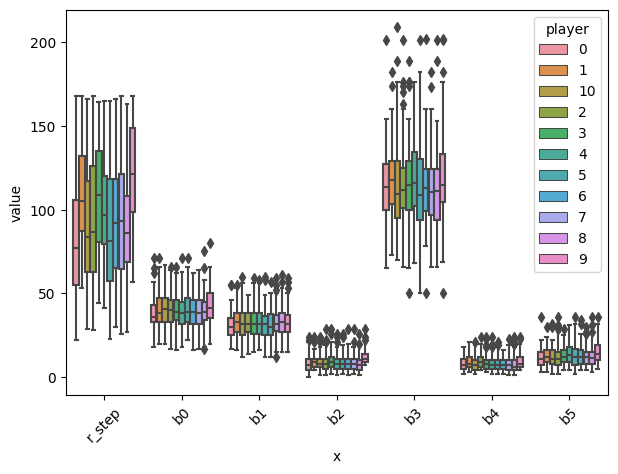

In [360]:
melted_df = match_result_noout.copy()

melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation', 'player']).sample(n=100, random_state=1)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
pprint(set(melted_df['concat_method']))
# Display Target
melted_df = melted_df[melted_df['concat_method'].isin(['random',
                                                       'mcts_knowledge_1.0_400_1',
                                                       'mcts_knowledge_0.75_400_1',
                                                       'mcts_knowledge_1.0_400_2',
                                                       'mcts_knowledge_0.75_400_2',
                                                       'mcts_score_400_2'])]

plt.figure(figsize=(7, 5))
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                    value_vars=[*StatisticsColumns], ignore_index=False)

melted_df['x'] = melted_df['variable']
# melted_df['x'] = melted_df['x'].str.replace('AlmostReachedKnowledgeStep', 'ar_step')	125.0
melted_df['x'] = melted_df['x'].str.replace('ReachedKnowledgeStep', 'r_step')

melted_df['x'] = melted_df['x'].str.replace('Matched_HorizontalPiece', 'b0')
melted_df['x'] = melted_df['x'].str.replace('Matched_VerticalPiece', 'b1')
melted_df['x'] = melted_df['x'].str.replace('Matched_CrossPiece', 'b2')
melted_df['x'] = melted_df['x'].str.replace('Matched_RocketPiece', 'b3')
melted_df['x'] = melted_df['x'].str.replace('Matched_BombPiece', 'b4')
melted_df['x'] = melted_df['x'].str.replace('Matched_RainbowPiece', 'b5')

ax = sns.boxplot(x="x", y="value", hue="player", data=melted_df)
plt.xticks(rotation=45)

In [361]:
for player_no in range(0, 4):
    player_df = match_result_noout[match_result_noout['player'] == player_no]
    melted_df = player_df.copy()

    melted_df.rename(columns={
        'ReachedKnowledgeStep':'100',
        'Q1ReachedKnowledgeStep':'25',
        'Q2ReachedKnowledgeStep':'50',
        'Q3ReachedKnowledgeStep':'75'
    }, inplace=True)

    _columns = [
    '25', '50', '75', '100',
    # Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece'
    ]

    # print(player_df.keys())
    sns.set_palette('Set2')
    melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=400, random_state=1, replace=True)
    melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
    melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                        value_vars=[*_columns], ignore_index=False)
    # pprint(set(melted_df['concat_method']))
    _methods = [
        'mcts_kp_-_400_2',
        'mcts_knowledge_1.0_400_2',
        'mcts_score_400_2',
        'random'
    ]
    melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

    plt.figure(figsize=(5, 4))
    plt.clf()
    ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, dodge=True, linewidth=0.8)

    plt.legend(loc='upper left')
    ax.set_title(f'Required Steps for Learning Skill (Player: {player_no})')
    ax.set_xlabel('Progress (%)')
    ax.set_ylabel('Step')
    plt.savefig(f'./figures/learning_steps_p{player_no}', dpi=300)
    plt.show()

ValueError: No objects to concatenate

In [ ]:
player_df = original_df.copy()
melted_df = player_df.copy()

melted_df.rename(columns={
    'ReachedKnowledgeStep':'100',
    'Q1ReachedKnowledgeStep':'25',
    'Q2ReachedKnowledgeStep':'50',
    'Q3ReachedKnowledgeStep':'75'
}, inplace=True)

_columns = [
'25', '50', '75', '100',
# Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece'
]

# print(player_df.keys())
sns.set_palette('Set2')
melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=400, random_state=1, replace=True)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                    value_vars=[*_columns], ignore_index=False)
# pprint(set(melted_df['concat_method']))
_methods = [
    'mcts_kp_-_400_2',
    'mcts_knowledge_1.0_400_2',
    'mcts_score_400_2',
    'random'
]
melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

plt.figure(figsize=(5, 4))
plt.clf()
ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, dodge=True, linewidth=0.8)

plt.legend(loc='upper left')
ax.set_title(f'Required Steps for Learning Skill (Player: All)')
ax.set_xlabel('Progress (%)')
ax.set_ylabel('Step')
plt.savefig(f'./figures/learning_steps_pA', dpi=300)
plt.show()



In [ ]:
for player_no in range(0, 4):
    player_df = original_df[original_df['player'] == player_no]
    melted_df = player_df.copy()

    melted_df.rename(columns={
        'ReachedKnowledgeStep':'100',
        'Q1ReachedKnowledgeStep':'25',
        'Q2ReachedKnowledgeStep':'50',
        'Q3ReachedKnowledgeStep':'75',
        'Matched_HorizontalPiece':'Horizon',
        'Matched_VerticalPiece':'Vertical',
        'Matched_CrossPiece':'Cross',
        'Matched_RocketPiece':'Rocket',
        'Matched_BombPiece':'Bomb',
        'Matched_RainbowPiece':'Rainbow',

    }, inplace=True)

    _columns = [
    # '25', '50', '75', '100',
    'Horizon', 'Vertical', 'Cross', 'Rocket', 'Bomb', 'Rainbow'
    ]

    # print(player_df.keys())
    sns.set_palette('Set3')
    melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=300, random_state=1, replace=False)
    melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
    melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                        value_vars=[*_columns], ignore_index=False)
    # pprint(set(melted_df['concat_method']))
    _methods = [
        'mcts_kp_-_400_2',
        'mcts_knowledge_1.0_400_2',
        'mcts_score_400_2',
        'random'
    ]
    melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

    plt.figure(figsize=(5, 4))
    plt.clf()
    ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, linewidth=0.8)

    plt.legend(loc='upper left')
    ax.set_title(f'Matched Blocks (Player: {player_no})')
    ax.set_xlabel('Block Type')
    ax.set_ylabel('Count')
    plt.xticks(rotation=45)
    plt.savefig(f'./figures/block_counts_p{player_no}', dpi=300)
    plt.show()

In [ ]:

player_df = original_df.copy()
melted_df = player_df.copy()

melted_df.rename(columns={
    'ReachedKnowledgeStep':'100',
    'Q1ReachedKnowledgeStep':'25',
    'Q2ReachedKnowledgeStep':'50',
    'Q3ReachedKnowledgeStep':'75',
    'Matched_HorizontalPiece':'Horizon',
    'Matched_VerticalPiece':'Vertical',
    'Matched_CrossPiece':'Cross',
    'Matched_RocketPiece':'Rocket',
    'Matched_BombPiece':'Bomb',
    'Matched_RainbowPiece':'Rainbow',

}, inplace=True)

_columns = [
# '25', '50', '75', '100',
'Horizon', 'Vertical', 'Cross', 'Rocket', 'Bomb', 'Rainbow'
]

# print(player_df.keys())
sns.set_palette('Set3')
melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=300, random_state=1, replace=True)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                    value_vars=[*_columns], ignore_index=False)
# pprint(set(melted_df['concat_method']))
_methods = [
    'mcts_knowledge_1.0_200_1',
    'mcts_knowledge_1.0_1000_3',
    'mcts_score_200_1',
    'random'
]
melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

plt.figure(figsize=(5, 4))
plt.clf()
ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, linewidth=0.8)

plt.legend(loc='upper left')
ax.set_title(f'Matched Blocks (Player: All)')
ax.set_xlabel('Block Type')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.savefig(f'./figures/block_counts_pA', dpi=300)
plt.show()

In [ ]:

for player_no in range(0, 4):

    player_df = match_result_noout[match_result_noout['player'] == str(player_no)]

    melted_df = player_df.copy()

    melted_df.rename(columns={
        'ReachedKnowledgeStep':'100',
        'Q1ReachedKnowledgeStep':'25',
        'Q2ReachedKnowledgeStep':'50',
        'Q3ReachedKnowledgeStep':'75'
    }, inplace=True)

    _columns = [
    '25', '50', '75', '100',
    # Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece'
    ]

    # print(player_df.keys())
    sns.set_palette('Set2')
    melted_df = melted_df.groupby(['method', 'simpleEffect', 'objective', 'playerDepth', 'simulation']).sample(n=300, random_state=1, replace=False)
    melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
    melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                        value_vars=[*_columns], ignore_index=False)
    pprint(set(melted_df['concat_method']))
    _methods = [
        'mcts_knowledge_1.0_200_1',
        'mcts_knowledge_1.0_1000_3',
        'mcts_score_200_1',
        'random'
    ]
    melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

    plt.figure(figsize=(5, 4))
    plt.clf()
    ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, dodge=True, linewidth=0.8)

    plt.legend(loc='upper left')
    ax.set_title(f'Required Steps for Learning Skill (Player: {player_no})')
    ax.set_xlabel('Progress (%)')
    ax.set_ylabel('Step')
    # plt.savefig(f'./figures/learning_steps_p{player_no}', dpi=300)
    plt.show()

In [ ]:



player_df = match_result_noout.copy()

melted_df = player_df.copy()

melted_df.rename(columns={
    'ReachedKnowledgeStep':'100',
    'Q1ReachedKnowledgeStep':'25',
    'Q2ReachedKnowledgeStep':'50',
    'Q3ReachedKnowledgeStep':'75'
}, inplace=True)

_columns = [
'25', '50', '75', '100',
# Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece'
]

# print(player_df.keys())
sns.set_palette('Set2')
melted_df = melted_df.groupby(['method', 'simpleEffect', 'objective', 'playerDepth', 'simulation']).sample(n=300, random_state=1, replace=False)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                    value_vars=[*_columns], ignore_index=False)
pprint(set(melted_df['concat_method']))
_methods = [
    'mcts_knowledge_1.0_200_1',
    'mcts_knowledge_1.0_1000_3',
    'mcts_score_200_1',
    'random'
]
melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

plt.figure(figsize=(5, 4))
plt.clf()
ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, dodge=True, linewidth=0.8)

plt.legend(loc='upper left')
ax.set_title(f'Required Steps for Learning Skill (Player: {player_no})')
ax.set_xlabel('Progress (%)')
ax.set_ylabel('Step')
# plt.savefig(f'./figures/learning_steps_p{player_no}', dpi=300)
plt.show()


In [ ]:



player_df = original_df.copy()
melted_df = player_df.copy()

melted_df.rename(columns={
    'ReachedKnowledgeStep':'100',
    'Q1ReachedKnowledgeStep':'25',
    'Q2ReachedKnowledgeStep':'50',
    'Q3ReachedKnowledgeStep':'75',
    'Matched_HorizontalPiece':'Horizon',
    'Matched_VerticalPiece':'Vertical',
    'Matched_CrossPiece':'Cross',
    'Matched_RocketPiece':'Rocket',
    'Matched_BombPiece':'Bomb',
    'Matched_RainbowPiece':'Rainbow',

}, inplace=True)

_columns = [
# '25', '50', '75', '100',
'Horizon', 'Vertical', 'Cross', 'Rocket', 'Bomb', 'Rainbow'
]

# print(player_df.keys())
sns.set_palette('Set3')
melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=500, random_state=1, replace=True)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                    value_vars=[*_columns], ignore_index=False)
# pprint(set(melted_df['concat_method']))
_methods = [
    'mcts_kp_-_400_2',
    'mcts_knowledge_1.0_400_2',
    'mcts_score_400_2',
    'random'
]
melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

plt.figure(figsize=(5, 4))
plt.clf()
ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, linewidth=0.8)

plt.legend(loc='upper left')
ax.set_title(f'Matched Blocks (Player: All)')
ax.set_xlabel('Block Type')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.savefig(f'./figures/block_counts_pA', dpi=300)
plt.show()
